## 다중회귀모델(Multiple Regression Model)
#### - 여러개의 특성(독립변수 = 항목 = 컬럼 = 변수 = *퓨처)을 사용한 선형 회귀
#### - 특성이 많을 수록, 복잡도가 높아 집니다
#### - 1개의 특성으로 선형회귀모델이 '직선'을 학습한다면,
#### - 2개이상의 특성으로는 선형회귀모델이 '평면'을 학습하게 됩니다
##### 
## 다중회귀모델 공식(방정식)
#### y = a*특성 + b*특성2 + c*특성3 +.....+ y절편

### 데이터 불러오기

In [1]:
import pandas as pd 
import numpy as np

In [68]:
df = pd.read_csv('./data/03_농어의_길이_높이_두께_데이터.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


##  < 사용할 데이터 >
#### - 훈련데이터(독립변수) : 길이(length), 높이(height), 두께(width)
#### - target데이터(종속변수) : 무게
#### - 새로 추가할 데이터 : (길이*높이) = 면적
#### - 모든 작업은 sklearn에서 제공하는 함수 이용
## 
## 특성공학
#### - 기존의 특성을 이용해서 ' 새로운특성(항목)'을 만들어 내는 작업
#### 

In [3]:
### 데이터 프레임을 2차원으로 바꾸기
# 데이터프레임은 2차원
# to_numpy()
# perch_full : 훈련데이터

perch_full = df.to_numpy()

In [4]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 훈련데이터와 테스트데이터 분리하기
# 훈련데이터/테스트데이터 세트 생성하기 
# 순서 중요,,! 
train_input,test_input, train_target,test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [76]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)
train_input


(42, 3)
(42,)
(14, 3)
(14,)


array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [8]:
# sklearn 변환기 클래스 
from sklearn.preprocessing import PolynomialFeatures

In [9]:
## 객체생성(모델)
# poly = PolynomialFeatures()
poly = PolynomialFeatures(include_bias = False)

## 임의값 사용
temp_data = [[2,3]]

### 훈련시키기 ; 새롭게 만들 스스로 특성 조합 찾기
poly.fit(temp_data)

## 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp_data))

## <변환기 특성 조합 생성 규칙> ---- 틀렷나..? 아닐수도? 
# - 첫번째 나온 1의값 : y 절편값 (무조건 처음에는 1이 나옴)
# - 두번째 ~ 세번째 : 자기자신의 값을 그대로 넣는다 (원본데이터 그대로)
# - 네번째 : 2의 값을 제곱 
# - 다섯번째 : 2*3
# - 여섯번째 : 3의 제곱 

# y 절편 1의 값은 PolynomialFeatures 클래스에서 기본적으로
# 특성에 추가된 절편값을 무시
# - 추가된 y 절편 1의 값은 무시해도 되는 값 
# - 보통 PolynomialFeatures 클래스 생성시에 제외시키는 속성을 사용
# - include_bias = False 옵션 사용하면 y 절편값 제외시킨다 PolynomialFeatures(include_bias = False)

[[2. 3. 4. 6. 9.]]


## 특성 만들기 : sklearn의 변환기
#### - sklearn은 특성을 만들거나 전처리 하기위한 다양한 객체를 제공
#### - sklearn에서 제공하는 이런 클래스들을 '변환기' 라고 부름
## <특성 생성 패키지 >
#### - 사용되는 패키지 : sklearn.preprocessing
#### - 사용되는 클래스 : PolynomialFeatures
#### - 사용되는 함수 : fit(), transforem() , fit_transforms()
#### - 특성생성시 사용하는 데이터는 train_input, test_input 2개
#### - 훈련에 영향을 미치는 특성(항목)을스스로 찾아서 생성하는 것이 목적이기 때문에 target데이터는 해당사항이 없다 ( 정답은 변경되면 안된다)

In [73]:
## 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용 
## degree = 2 

# 객체생성 (모델)
poly = PolynomialFeatures(include_bias = False)

# 훈련시키기
train_poly = poly.fit(train_input)

# 훈련데이터 변환히기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(test_poly.shape)

(42, 9)
(14, 9)


array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [14]:
# 훈련모델이 사용된 조합의 패턴을 가지고 있다
poly.get_feature_names()
poly.get_feature_names_out()

# 원래값 x0, x1, x2 

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 다중회귀 모델 훈련하기 : 훈련모델 생성 

In [ ]:
### 훈련데이터와 테스트데이터 결정값 확인

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
# 객체생성(모델생성)
lr = LinearRegression()

# 훈련모델생성
lr.fit(train_poly, train_target)

#결정값 확인 
print('훈련 = ',lr.score(train_poly, train_target))
print('테스트 = ',lr.score(test_poly, test_target))

훈련 =  0.9903183436982126
테스트 =  0.9714559911594125


In [19]:
# 객체생성 (모델)
poly = PolynomialFeatures(degree=5, include_bias = False)

# 훈련시키기
train_poly = poly.fit(train_input)

# 훈련데이터 변환히기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(test_poly.shape)

(42, 55)
(14, 55)


In [22]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [23]:
lr.fit(train_poly, train_target)
print('훈련', lr.score(train_poly, train_target))
print('테스트',lr.score(test_poly, test_target))

훈련 0.9999999999997232
테스트 -144.40564483377855


### [해석]
##### - 테스트 평가결과는 매우 큰 음수값 발생
##### - 훈련 평가결과는 매우 좋다
##### - 이 모델 훈련결과가 좋을수록 테스트결과가 안좋게 나오는 결과를 보일 수 있습니다
##### - 과대적합

## 과적합을 줄이는 방법 :규제
#### - 규제 : 과대적합이 일어나지 않도록 제어한느 개념
#### - 계수(기울기포함)의 값을 줄이는 방법을 규제라고 합니다
#### - 규제 개념이 적용된 모델 : 릿지(ridge)회귀모델, 라쏘(lasso)회귀모델
#### - 주로 릿지(ridge)회귀모델을 선호하는 편

## <규제순서>
#### 1. 정규화 : 스케일이 달느 항목들을 표준점수로 동일하게 표준화 합니다.
#### - 표준점수는 sklearn에서 제공하는 클래스 사용
#### 2. 릿지 및 라쏘 모델 적용
## 릿지(ridge)
#### - 계수를 제곱한 값을 기준으로 규제를 적용
#### - 사용패키지 : sklearn.linear_model
#### - 사용클래스(모델) : Ridge
#### - 훈련, 평가, 테스트 : 기존과 동일한 함수 사용
## 라쏘(lasso)
#### - 계수의 절대값을 기준으로 규제를 적용
#### 계수의 값을 0으로 만들수도 있다
#### - 사용패키지 : sklearn.linear_model
#### - 사용클래스 (모델) : Lasso
#### - 훈련, 평가, 테스트 : 기존과 동일한 함수 사용 

In [24]:
### 정규화(또는 표준화)

### 사용패키지 
from sklearn.preprocessing import StandardScaler

In [25]:
### 클래스 (모델) 생성하기
ss = StandardScaler()

In [ ]:
ss.fit(train_poly, train_target)

In [30]:
## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# print(train_scaled)
# print(test_scaled)

# 각 데이터는 55개씩
# 평균 및 표준편차 확인하기
print(ss.mean_,ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [ ]:
## 릿지모델과 라쏘모델을 이용해서
## 각각 모델에 대한 훈련/테스트 결정계수 확인 

In [32]:
from sklearn.linear_model import Ridge

In [41]:
# Ridge 모델
# 객체 생성하기 
rdg = Ridge()

# 훈련 시키기
rdg.fit(train_scaled,train_target)

# 결정계수
print('ridge model 훈련 =',rdg.score(train_scaled,train_target))
print('ridge model 테스트 =',rdg.score(test_scaled,test_target))

ridge model 훈련 = 0.9896101671037343
ridge model 테스트 = 0.9790693977615387


In [33]:
from sklearn.linear_model import Lasso

In [42]:
# Lasso 모델
las = Lasso()

# 훈련 시키기
las.fit(train_scaled,train_target)

# 결정계수
print('lasso model 테스트 =',las.score(train_scaled,train_target))
print('lasso model 테스트 =',las.score(test_scaled,test_target))

lasso model 테스트 = 0.989789897208096
lasso model 테스트 = 0.9800593698421883


## 규제강도 조절하기 
#### - Ridge 및 Lasso 모델의 경우 규제에 대한 강도를 조절하는 속성이 있다
#### - alpha 속성을 사용
#### - 규제강도 alpha 속성에 들어가는 값을 알려주는 라이브러리는 없다
#### - 사람이 직접 넣어주어야 한다 
#### - 보통 모델 함수 속성중에 사람이 직접 값을 넣어주는 속성들을 '하이퍼파라미터' 라고 한다
#### - 파라미터 또는 하이퍼파라미터 라는 용어를 간혹 쓰시는 분들이 있다

## <alpha 조절값 찾는 방법>
#### - 정해진 방법 없다
#### - 일반적으로 훈련데이터와 학습데이터로 각각 훈련모델을 생성한 후 평가를 통해 결정계수 값을 이용, 그래프를 그린후에
####    훈련데이터와 테스트 데이터의 결정계수 값이 가장 가까워지는 지점의 x 축값을 이용해서 alpha값으로 결정

In [43]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt 

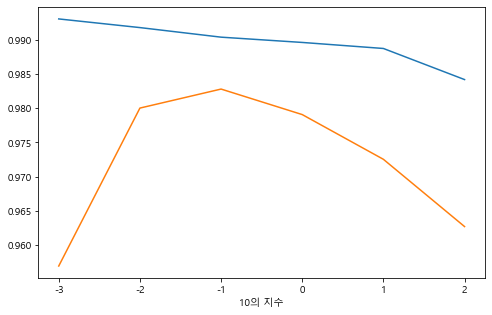

In [52]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score=[]
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score=[]

# 임의의 alpha값(x축으로 설정합니다) 설정(범위설정)
alpha_list = [0.001, 0.01,0.1, 1,10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    ridge = Ridge(alpha = alpha) # 규제강도 속성 
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    

## 그래프로 시작화
# log10 : 지수로 표현 
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize = (8,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('10의 지수')
plt.show()

# 파랑 : 훈련데이터 
# 주황 : 테슽데이터
# 테스트데이터가 -2 이하일때, 0이상일떄 : 과소적합 

In [64]:
# Ridge 모델 
# x 축이 -1 일때 가장 가까운 값 10^-1 = 0.1 이기 때문에 alpha = 0.1 대입 
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print('Ridge model 훈련 = ',ridge.score(train_scaled, train_target))
print('Ridge model 테스트 = ',ridge.score(test_scaled, test_target))

Ridge model 훈련 =  0.9903815817570367
Ridge model 테스트 =  0.9827976465386928


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e+02
  model 

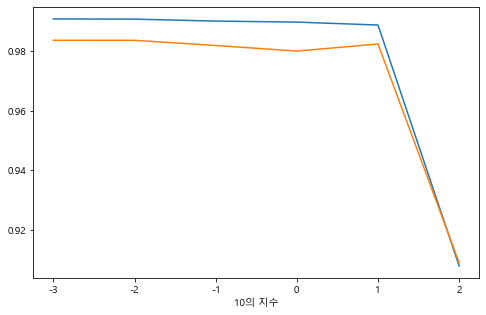

In [57]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score=[]
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score=[]

# 임의의 alpha값(x축으로 설정합니다) 설정(범위설정)
alpha_list = [0.001, 0.01,0.1, 1,10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    lasso = Lasso(alpha = alpha) # 규제강도 속성 
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    

## 그래프로 시작화
# log10 : 지수로 표현 
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize = (8,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('10의 지수')
plt.show()

# 1이후부터 훈련모델 테스트 모델 둘다 과소적합 

In [63]:
# Lasso 모델 
# x 축이 1일때 가장 가까운 값 10^1 = 10 이기 때문에 alpha = 10 대입 
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print('Lasso model 훈련 = ',lasso.score(train_scaled, train_target))
print('Lasso model 테스트 = ',lasso.score(test_scaled, test_target))

Lasso model 훈련 =  0.9888067471131867
Lasso model 테스트 =  0.9824470598706695


#### ridge model 훈련 = 0.9896101671037343
#### ridge model 테스트 = 0.9790693977615387
#### lasso model 테스트 = 0.989789897208096
#### lasso model 테스트 = 0.9800593698421883
#### -------------------규제강도 조절 후 --------------------
#### Ridge model 훈련 =  0.9903815817570367 **
#### Ridge model 테스트 =  0.9827976465386928 **
#### Lasso model 훈련 =  0.9888067471131867
#### Lasso model 테스트 =  0.9824470598706695
# >> 릿지모델로 결정 <<

## [문제]
#### - 테스트 데이터 : length = 50 , height = 16.49, width=10.6
#### - 위 다중, 릿지,라쏘 모두 예측해보기 

> 다중회귀

In [99]:
# 객체생성 (모델)
poly = PolynomialFeatures(degree=5,include_bias = False)

# 훈련시키기
train_poly = poly.fit(train_input)

# 훈련데이터 변환히기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

# sample 데이터 변환하기
sample_poly = poly.transform([[50,16.49,10.6]])

# 객체생성(모델생성)
lr = LinearRegression()

# 훈련모델생성
lr.fit(train_poly, train_target)

# 테스트 하기
lr.score(test_poly, test_target)

#예측하기
lr.predict(sample_poly)



array([-562042.17698383])

> Ridge 모델

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
ss = StandardScaler()
ss.fit(train_poly, train_target)

## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# sample 데이터 변환
sample_new = ss.transform(sample_poly)

# Ridge 모델 사용 
from sklearn.linear_model import Ridge
rdg = Ridge()

# 훈련 시키기
rdg.fit(train_scaled,train_target)

rdg.predict(sample_new)

# 결정계수
# print('ridge model 훈련 =',rdg.score(train_scaled,train_target))
# print('ridge model 테스트 =',rdg.score(test_scaled,test_target))

array([2365.94632465])

> Lasso 모델

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
from sklearn.linear_model import Lasso
# Lasso 모델
las = Lasso()

# 훈련 시키기
las.fit(train_scaled,train_target)
las.score(test_scaled , test_target)
las.predict(sample_new)


# 결정계수
# print('lasso model 테스트 =',las.score(train_scaled,train_target))
# print('lasso model 테스트 =',las.score(test_scaled,test_target))

array([2391.07427405])

> 규제 강도 조절 후 Ridge 모델 

In [110]:
# Ridge 모델 
# x 축이 -1 일때 가장 가까운 값 10^-1 = 0.1 이기 때문에 alpha = 0.1 대입 
rdg = Ridge(alpha = 0.1)
rdg.fit(train_scaled, train_target)
rdg.predict(sample_new)

array([2259.84739892])

> 규제강도 조절 후 Lasso 모델

In [111]:
# Lasso 모델 
# x 축이 1일때 가장 가까운 값 10^1 = 10 이기 때문에 alpha = 10 대입 
las = Lasso(alpha = 10)
las.fit(train_scaled, train_target)
las.predict(sample_new)

array([2232.10145456])

## [문제]

In [126]:
data = pd.read_csv('./data/04_(문제)_회귀모델_drinking_water.csv')
data.head()

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2


In [132]:
data_1 = data[['친밀도','적절성']]
data_2 = data[['만족도']]

,친밀도,적절성
0,3,4
1,3,3
2,4,4
3,2,2
4,2,2
...,...,...
259,3,4
260,3,4
261,4,4
262,4,4


In [133]:
data_1 = data_1.to_numpy()
data_2 = data_2.to_numpy()

In [135]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target,test_target = train_test_split(data_1, data_2, random_state=42)

print(train_input)
print(train_target)

[[3 2]
 [4 4]
 [3 2]
 [4 4]
 [3 3]
 [3 3]
 [3 3]
 [3 2]
 [4 4]
 [3 3]
 [1 2]
 [4 4]
 [3 4]
 [1 3]
 [4 3]
 [3 4]
 [3 3]
 [3 3]
 [4 4]
 [4 4]
 [2 3]
 [5 5]
 [3 3]
 [1 4]
 [3 3]
 [3 3]
 [1 3]
 [3 2]
 [4 4]
 [3 2]
 [1 3]
 [2 2]
 [3 3]
 [3 4]
 [3 3]
 [3 2]
 [3 4]
 [3 3]
 [3 3]
 [1 4]
 [4 4]
 [4 4]
 [2 3]
 [1 1]
 [3 1]
 [3 2]
 [2 3]
 [3 4]
 [4 3]
 [4 4]
 [2 3]
 [4 4]
 [1 4]
 [3 3]
 [2 3]
 [4 3]
 [4 3]
 [3 4]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [3 2]
 [3 3]
 [4 4]
 [3 3]
 [2 3]
 [1 2]
 [1 1]
 [3 4]
 [3 3]
 [5 5]
 [3 2]
 [3 3]
 [1 4]
 [2 3]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [5 5]
 [4 3]
 [1 2]
 [2 2]
 [3 2]
 [3 4]
 [4 4]
 [3 2]
 [3 3]
 [3 3]
 [3 4]
 [4 5]
 [3 3]
 [1 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [2 3]
 [3 3]
 [3 3]
 [3 3]
 [4 4]
 [2 4]
 [3 3]
 [1 4]
 [3 3]
 [4 4]
 [3 3]
 [1 4]
 [3 3]
 [3 4]
 [3 2]
 [3 3]
 [3 3]
 [2 2]
 [4 3]
 [3 3]
 [3 4]
 [3 3]
 [3 2]
 [4 3]
 [3 2]
 [3 3]
 [4 5]
 [3 4]
 [4 4]
 [2 2]
 [2 3]
 [3 4]
 [3 3]
 [1 4]
 [3 3]
 [1 2]
 [4 4]
 [4 4]
 [3 2]
 [3 2]
 [3 3]
 [3 3]
 [3 3]

In [144]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.score(test_input, test_target))
print(lr.score(train_input, train_target))

lr.predict([[4,3]])

0.5995961077787295
0.589220642902726


array([[3.04837474]])

> 다중회귀모델

In [146]:
# 객체생성 (모델)
poly = PolynomialFeatures(degree=5,include_bias = False)

# 훈련시키기
train_poly = poly.fit(train_input)

# 훈련데이터 변환히기
train_poly = poly.transform(train_input)

# 테스트데이터 변환하기
test_poly = poly.transform(test_input)

# sample 데이터 변환하기
sample_poly = poly.transform([[4,3]])

# 객체생성(모델생성)
lr = LinearRegression()

# 훈련모델생성
lr.fit(train_poly, train_target)

# 테스트 하기
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#예측하기
lr.predict(sample_poly)


0.6686865960782669
-1.0195702935601885


array([[3.54545455]])

> ridge 모델 

In [149]:
ss = StandardScaler()
ss.fit(train_poly, train_target)

## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# sample 데이터 변환
sample_new = ss.transform(sample_poly)

# Ridge 모델 사용 
from sklearn.linear_model import Ridge
rdg = Ridge()

# 훈련 시키기
rdg.fit(train_scaled,train_target)



print(rdg.score(train_scaled,train_target))
print(rdg.score(test_scaled, test_target))

# 예측하기
rdg.predict(sample_new)

0.6428834595890419
0.6342200586076697


array([[3.5289231]])

> Lasso 모델 

In [150]:
from sklearn.linear_model import Lasso
# Lasso 모델
las = Lasso()

# 훈련 시키기
las.fit(train_scaled,train_target)
las.score(test_scaled , test_target)
las.predict(sample_new)


# 결정계수
print('lasso model 테스트 =',las.score(train_scaled,train_target))
print('lasso model 테스트 =',las.score(test_scaled,test_target))

lasso model 테스트 = 0.0
lasso model 테스트 = -0.03759780907668264


> alpha 값 구하기 : Ridge 모델

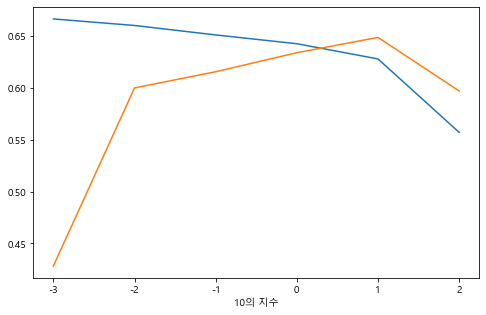

In [158]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score=[]
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score=[]

# 임의의 alpha값(x축으로 설정합니다) 설정(범위설정)
alpha_list = [0.001, 0.01,0.1, 1,10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    ridge = Ridge(alpha = alpha) # 규제강도 속성 
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    

## 그래프로 시작화
# log10 : 지수로 표현 
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize = (8,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('10의 지수')
plt.show()

# 그래프 기울기가 양수면 = 과대적합
# 그래프 기울기가 음수면 = 과소적합


### 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
### 2. 과소적합 : 훈련데이터의 평가 결과가 낮고 ,테스트데이터의 평가가 높은 경우

In [160]:
# Ridge 모델 
# x 축이 -1 일때 가장 가까운 값 10^-1 = 0.1 이기 때문에 alpha = 0.1 대입 
rdg = Ridge(alpha = 0.)
rdg.fit(train_scaled, train_target)
rdg.predict(sample_new)

print(rdg.score(train_scaled, train_target))
print(rdg.score(test_scaled, test_target))


0.6491945185325882
0.6206095429241811


> alpha값 구하기 Lasso 모델 

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.100e-01, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 0, '10의 지수')

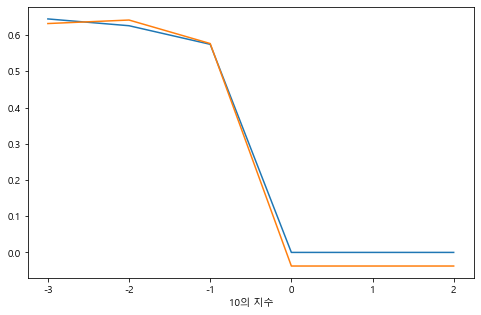

In [156]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score=[]
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score=[]

# 임의의 alpha값(x축으로 설정합니다) 설정(범위설정)
alpha_list = [0.001, 0.01,0.1, 1,10, 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list :
    # 릿지 모델
    lasso = Lasso(alpha = alpha) # 규제강도 속성 
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    

## 그래프로 시작화
# log10 : 지수로 표현 
plt.rc('font',family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False ## 음수부호 표시하기
plt.figure(figsize = (8,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('10의 지수')

In [166]:
# Lasso 모델 
# x 축이 1일때 가장 가까운 값 10^1 = 10 이기 때문에 alpha = 10 대입 
las = Lasso(alpha = 0.0032)
las.fit(train_scaled, train_target)
las.predict(sample_new)
print(las.score(train_scaled, train_target))
print(las.score(test_scaled, test_target))

0.640155344737469
0.6441082537540066


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e-01, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(
